In [2]:
# we consider a least square problem, f(x) = (Ax-b)^2
import numpy as np
import numpy.linalg as la
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from math import sqrt


import warnings
warnings.filterwarnings("error")

In [3]:
np.random.seed(seed=42)
agent_num = 10

d=100
data_num = 20
# x_opt = np.ones((d))/d
x_opt = np.random.randn(d)+10
x_local_opt = np.tile(x_opt,(agent_num, 1))
x_local_opt = x_local_opt+  np.random.rand(agent_num, d)
# print(x_local_opt[:,0])
# P = ortho_group.rvs(d)
A = np.zeros((agent_num, data_num, d))
b = np.zeros((agent_num, data_num))

for i in range(agent_num):
    P = ortho_group.rvs(d)
    eigv = (np.random.rand(d))
    eigv[0:5] = np.zeros(5)
    A_temp = np.matmul( np.diag(eigv), P)
    A[i] = A_temp[0:data_num,:]
# A = np.matmul(np.transpose(P), np.matmul( np.diag(eigv), P))
# x_opt = np.random.rand(d)
    b[i] = np.matmul( A[i], x_local_opt[i])
    
    
# filename = "d_1000_n_10"
# np.save(filename+"_A", A)
# np.save(filename+"_b", b)
# np.save(filename+"_x", x_opt)
print(np.linalg.matrix_rank(np.matmul(np.transpose(A[1]), A[1])))


15


7.458751749331938
[[0.9  0.05 0.   0.   0.   0.   0.   0.   0.   0.05]
 [0.05 0.9  0.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.05 0.9  0.05 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.05 0.9  0.05 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.05 0.9  0.05 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.05 0.9  0.05 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.05 0.9  0.05 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.05 0.9  0.05 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.05 0.9  0.05]
 [0.05 0.   0.   0.   0.   0.   0.   0.   0.05 0.9 ]]
10
[0.8       0.8190983 0.8690983 0.9309017 1.        0.9809017 0.9809017
 0.9309017 0.8190983 0.8690983]


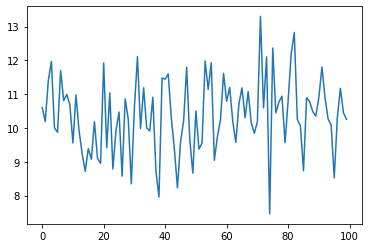

In [4]:
# gamma = np.load("gamma.npy")

# # we first try to calculate the real optimal x_star
A_stack = np.reshape(A, (200,100))
b_stack = np.reshape(b, (200))


# C = np.zeros((d,d-1))
# for i in range(d-1):
#     C[i,i] = 1
# C[d-1,:]=-1
# # print(C)
# A_prime = np.matmul(A_stack, C)

# c_vector = np.zeros((d))
# c_vector[-1]=1
# # print(c_vector)
# b_prime = b_stack - np.matmul(A_stack, c_vector)


# pinv_A = np.linalg.pinv(A_prime)
# x_temp = np.matmul(pinv_A, b_prime)
# x_direct = np.zeros((d))
# x_direct[:d-1] = x_temp
# x_direct[d-1] = 1 - np.sum(x_temp)
# print(x_direct[0])
# error = np.matmul(A_stack, x_direct)-b_stack
# loss_star = np.matmul(np.transpose(error), error)
# print(np.sum(loss_star))
pinv_A = np.linalg.pinv(A_stack)
x_direct = np.matmul(pinv_A, b_stack)
# print(x_direct[0])
error = np.matmul(A_stack, x_direct)-b_stack
loss_star = np.matmul(np.transpose(error), error)
plt.plot(x_direct)
print(np.min(x_direct))
agent_num = 10
rho = 1
P = np.zeros((10,10))
beta = 0.1

for i in range(10):
    for j in range(10):
        if i == j:
            P[i,j] = 1 - beta
        if np.abs(i-j) == 1:
#         if np.abs(i-j) == 1 or np.abs(i-j) == 2:
            P[i, j] = beta/2
        if (10 - np.abs(i-j)) == 1 :
#         if (10 - np.abs(i-j)) == 1 or (10 - np.abs(i-j)) == 2:
            P[i, j] = beta/2
            

print(P)
P_tilde = (P+np.eye(agent_num))/2
# print(P_tilde)
# x_0 = np.random.rand( d)
x_0 = np.ones((agent_num, d))/d
# x_0 = np.random.rand(agent_num, d)

print(np.linalg.matrix_rank(P))
ev = la.eigvals(P)
print(ev)

In [21]:
import time
x_0 = np.random.rand(agent_num, d)

#first is gradient Descent
iter_num = 1000000
lr = 1
time_int = 0.01

x_k = np.zeros((agent_num,d))
x_k1 = np.zeros((agent_num,d))

z_k = np.zeros((agent_num,d))
z_k1 = np.zeros((agent_num,d))
# x_k2 = np.zeros((agent_num,d))
y_k = np.zeros((agent_num,d))
y_k1 = np.zeros((agent_num,d))
# y_k2 = np.zeros((agent_num,d))
# x_accumulate = np.zeros((agent_num,d))
# y_accumulate = np.zeros((agent_num,d))


# z = np.zeros(d)
# loss_z = np.zeros((iter_num))
loss_x_global = np.zeros((agent_num, iter_num))
# accu_x_record = np.zeros((iter_num))
# accu_y_record = np.zeros((iter_num))
x_record = np.zeros((iter_num))
x_mean = np.zeros((iter_num))
loss = np.zeros((agent_num, iter_num))

# z = np.mean(x_0, axis = 0)
# for i in  range(agent_num):

#     x_k[i] = np.copy(x_0)
x_k = np.copy(x_0)

# 
# z_k =  np.copy(x_k)

z_k =  np.log(x_k)+1
# 
for k in tqdm(range( iter_num)):
    for i in range(agent_num):

        local_x_average = np.matmul(np.expand_dims(P[i,:], axis=0), x_k ) 
        z_k[i,:] =  np.log(local_x_average)+1
        gradient_k1 = np.matmul(np.transpose(A[i]), (np.matmul(A[i], x_k[i,:])-b[i]))
#         y_k1[i,:] = y_k[i,:] + time_int*(x_k[(i+1)%agent_num,:]+x_k[(i-1)%agent_num,:] - 2*x_k[i,:])
#         z_k1[i,:] = z_k[i,:] -time_int* (lr*gradient_k1)
        z_k1[i,:] = z_k[i,:] -time_int*(lr*gradient_k1)
#         z_k1[i,:] = np.abs(z_k1[i,:])

        error = np.matmul(A[i], x_k[i,:])-b[i]
        loss[i, k] = np.matmul(np.transpose(error), error)
        
#    change mirror method     
    for i in range(agent_num):
        x_k[i,:] = np.exp(z_k1[i,:])/np.exp(1)
#         print(np.max(x_k[i,:]))
#         x_k[i,:] = np.exp(z_k1[i,:])/sum(np.exp(z_k1[i,:]))
#     
    
    z_k = np.copy(z_k1)
    y_k = np.copy(y_k1)

#     z = np.mean(x_k, axis = 0)
#     print(z[0])
#     for i in range(agent_num):
#     error = np.matmul(A_stack, z)-b_stack
#     loss_z[k] = np.matmul(np.transpose(error), error)


    temp_sum = 0
    x_bar = np.mean(x_k, axis=0)
    for agent in range(agent_num):
        temp_sum += np.linalg.norm(x_k[agent,:]-x_bar)
    x_record[k] = temp_sum/agent_num
#     x_mean[k] = np.mean(x_k[:,0])-x_direct[0]

    for i in range(agent_num):
#         print(x_k[i,:])
#         np.matmul(A_stack, )
        error = np.matmul(A_stack, x_k[i,:])-b_stack
        loss_x_global[i,k] = np.matmul(np.transpose(error), error)
#         if((loss_x_global[i,k]-loss_star)< 0.01):
#             time.sleep(3600)



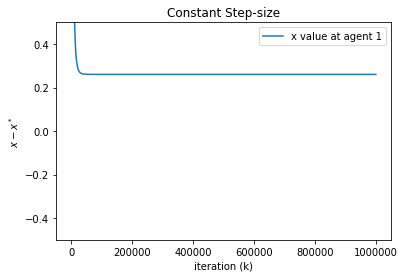

In [23]:
plt.plot(x_record, label='x value at agent 1')
# plt.plot(x_mean, label='x value of global average')
# plt.scatter(accu_x_record[1:])
# plt.plot(gamma[1:20000])
y_range = 0.5
plt.ylim((-y_range,y_range))

plt.xlabel('iteration (k)')
plt.ylabel('$x - x^*$')
# ax.annotate('', xy=(0.99, 0), ha='left', va='top', xycoords='axes fraction', fontsize=8)
plt.title("Constant Step-size")

plt.legend(loc='upper right')

# print(accu_x_record[-
# plt.savefig("consensus_constant")
# print(gamma[100000])

In [6]:
# plt.plot(x_record[1000000:])
# plt.plot(gamma[1:20000])
# plt.ylim((-5e10,5000000))
# print(x_record[-1])
# plt.xlabel("local x value")

# plt.savefig("non_accel_EXTRA x_record 5m_it over_k")

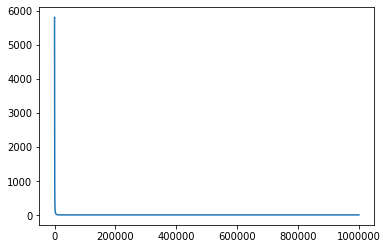

In [7]:
# loss_z_k2 = (loss_z-loss_star)*range(iter_num)*range(iter_num)
# loss_z_k1 = (loss_z-loss_star)*range(iter_num)
plt.plot(loss_x_global[0,:])
# plt.ylim((-0.01,0.5))
# print(loss_z_k2[1:].min())
# print((loss_z*range(iter_num))[-1])
# plt.xlabel("(loss-loss*)xk^2")
# plt.savefig("non_accel_EXTRA (loss-loss_star)k 5m_it over_k")

# plt.savefig("constant_100k_simplex_loss")

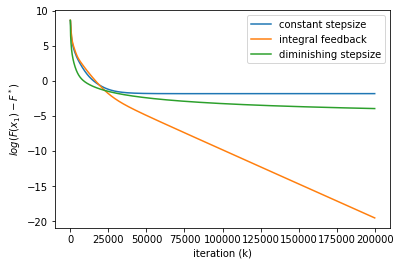

In [14]:
proposed_loss = np.load("100d_simplex_100k_loss.npy")
diminish_loss = np.load("100d_diminishing_simplex_100k_loss.npy")



for i in range(1):
    
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)*range(iter_num)
    proposedloss_x = (proposed_loss[i,:]-loss_star)
    diminishloss_x = (diminish_loss[i,:]-loss_star)
    loss_x = (loss_x_global[i,:]-loss_star)
    
#     loss_x_k2 = (loss_x_global[i,:])*range(iter_num)*range(iter_num)
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)
    plt.plot(np.log(loss_x[1:200000]),label='constant stepsize')
    plt.plot(np.log(proposedloss_x[1:200000]), label='integral feedback')
    plt.plot(np.log(diminishloss_x[1:200000]), label='diminishing stepsize')
plt.xlabel('iteration (k)')
plt.ylabel('$log(F(x_1) - F^*)$')
plt.legend(loc='upper right')

# loss_x2_k2 = (loss[1,:]-loss_star)*range(iter_num)*range(iter_num)
# plt.savefig("comparison_1m_simplex_log(local_loss-loss_star)")

# plt.plot(loss_x2_k2[1:])
# plt.ylim((0,1))
# print(loss_x_k2[1:].min())
# print(loss_z*range(30000)[-1])

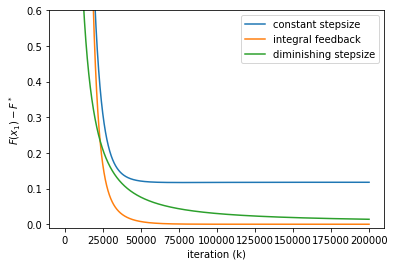

In [8]:
proposed_loss = np.load("100d_simplex_100k_loss.npy")
diminish_loss = np.load("100d_diminishing_simplex_100k_loss.npy")



# for i in range(1):
i=1    
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)*range(iter_num)
proposedloss_x = (proposed_loss[i,:]-loss_star)
diminishloss_x = (diminish_loss[i,:]-loss_star)
loss_x = (loss_x_global[i,:]-loss_star)

#     loss_x_k2 = (loss_x_global[i,:])*range(iter_num)*range(iter_num)
#     loss_x_k2 = (loss_x_global[i,:]-loss_star)*range(iter_num)
plt.plot((loss_x[1:200000]), label='constant stepsize')
plt.plot((proposedloss_x[1:200000]), label='integral feedback')
plt.plot((diminishloss_x[1:200000]), label='diminishing stepsize')
# loss_x2_k2 = (loss[1,:]-loss_star)*range(iter_num)*range(iter_num)
# plt.plot(loss_x2_k2[1:])
plt.ylim((-0.01,0.6))
plt.xlabel('iteration (k)')
plt.ylabel('$F(x_1) - F^*$')


plt.legend(loc='upper right')
# print(loss_x_k2[1:].min())
# print(loss_z*range(30000)[-1])
# plt.xlabel("(loss-loss*)xk^2")
plt.savefig("comparison_1m_simplex_(local_loss-loss_star)")


In [24]:
# np.save("100d_constant_simplex_1m_loss", loss_x_global)
# np.save("100d_constant_simplex_1m_loss_star", loss_star)
np.save("100d_constant_simplex_1m_x_minus_bar", x_record)